In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import rotanimate

In [2]:
data_fname = 'surf_bias_data.txt'
data = np.genfromtxt(data_fname, skip_header=1)

In [3]:
X, Y = np.meshgrid(data[:,0], data[:,1])
Z_Dtau = griddata((data[:,0], data[:,1]), data[:,2], (X, Y))#, method='cubic')
Z_Dstau = griddata((data[:,0], data[:,1]), data[:,3], (X, Y))#, method='cubic')

In [4]:
figsize = (7, 5)
angles = np.linspace(0,360,21)[:-1] # A list of 20 angles between 0 and 360

<IPython.core.display.Javascript object>


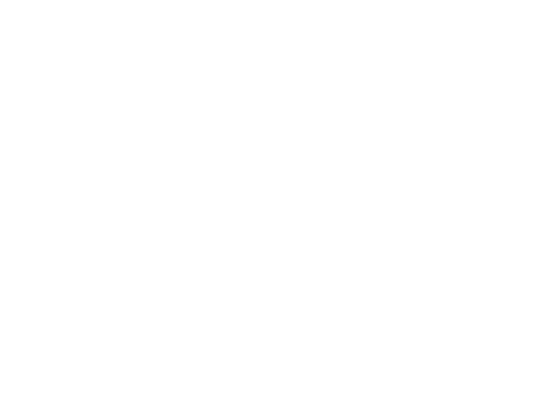

In [5]:
%matplotlib notebook
fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X, Y, Z_Dtau, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.plot_surface(X, Y, Z_Dtau, color='blue', linewidth=0, antialiased=False)
ax.set_title(r'Bias in Extracted $D\tau$ Proportion')
ax.set_xlabel(r'$D\tau$ Proportion')
ax.set_ylabel(r'$D^*\tau$ Proportion')
ax.set_zlabel(r'$D\tau$ Bias')
ax.set_xlim([0,0.03])
ax.set_xticks(np.linspace(0,0.03,4));
ax.set_ylim([0,0.03])
ax.set_yticks(np.linspace(0,0.03,4));

# create an animated gif (20ms between frames)
rotanimate.rotanimate(ax, angles,'dtau.gif',delay=50, width=figsize[0], height=figsize[1]) 

<IPython.core.display.Javascript object>


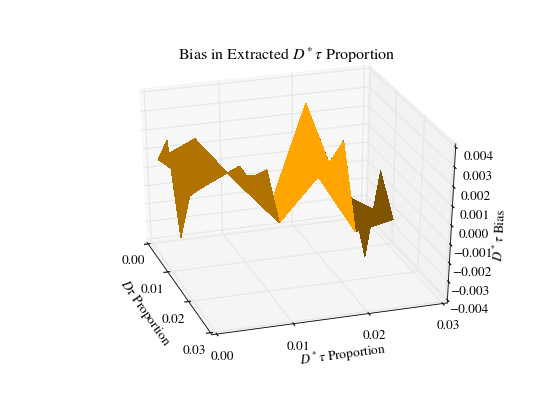

In [6]:
%matplotlib notebook
fig = plt.figure(figsize=figsize)

#ax.plot_wireframe(X, Y, Z_Dtau)
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X, Y, Z_Dstau, cmap=cm.PRGn, linewidth=0, antialiased=False)

ax.plot_surface(X, Y, Z_Dstau, color='orange', linewidth=0, antialiased=False)
ax.set_title(r'Bias in Extracted $D^*\tau$ Proportion')
ax.set_xlabel(r'$D\tau$ Proportion')
ax.set_ylabel(r'$D^*\tau$ Proportion')
ax.set_zlabel(r'$D^*\tau$ Bias')
ax.set_xlim([0,0.03])
ax.set_xticks(np.linspace(0,0.03,4));
ax.set_ylim([0,0.03])
ax.set_yticks(np.linspace(0,0.03,4));

rotanimate.rotanimate(ax, angles,'dstau.gif',delay=50, width=figsize[0], height=figsize[1]) 